# Bunch commands for pyTao

In [1]:
from pytao import Tao
from pytao.tao_ctypes import util
import numpy as np

import os

In [3]:
# Point to local installation
BASE_DIR=os.environ['ACC_ROOT_DIR'] 
print('Bmad installation: ', BASE_DIR)


# Pick an example init
root = os.path.join(BASE_DIR,'tao/examples/csr_beam_tracking/')
os.chdir(root)
init = root+'tao.init'
# Make tao instance
tao=Tao()   
tao.init('-noplot -init '+init);

Bmad installation:  /Users/slepicka/sandbox/git-lume/bmad/bmad_dist_2020_1110


---
## bunch1

In [4]:
# Bunch data for universe 1, branch 0, element 0 (beginnig) for the model.
tao.cmd('python bunch1 1@0>>0|model 1')

['beta_x;REAL;F;  3.1454698480000E-01',
 'alpha_x;REAL;F; -2.2075642140000E+00',
 'gamma_x;REAL;F;  1.8672376601123E+01',
 'phi_x;REAL;F;  0.0000000000000E+00',
 'eta_x;REAL;F;  0.0000000000000E+00',
 'etap_x;REAL;F;  0.0000000000000E+00',
 'sigma_x;REAL;F;  6.1862593312857E-05',
 'sigma_p_x;REAL;F;  4.7663415233375E-04',
 'emit_x;REAL;F;  1.2166641666667E-08',
 'norm_emit_x;REAL;F;  9.9992598367606E-07',
 'beta_y;REAL;F;  3.4385689760000E-01',
 'alpha_y;REAL;F;  1.9751085275000E+00',
 'gamma_y;REAL;F;  1.4253178370452E+01',
 'phi_y;REAL;F;  0.0000000000000E+00',
 'eta_y;REAL;F;  0.0000000000000E+00',
 'etap_y;REAL;F;  0.0000000000000E+00',
 'sigma_y;REAL;F;  6.4680628148703E-05',
 'sigma_p_y;REAL;F;  4.1642924230219E-04',
 'emit_y;REAL;F;  1.2166641666667E-08',
 'norm_emit_y;REAL;F;  9.9992598367606E-07',
 'beta_z;REAL;F;  0.0000000000000E+00',
 'alpha_z;REAL;F;  0.0000000000000E+00',
 'gamma_z;REAL;F;  0.0000000000000E+00',
 'phi_z;REAL;F;  0.0000000000000E+00',
 'eta_z;REAL;F;  0.00

In [5]:
%%tao
sho beam 0
write beam -at 0

-------------------------
Tao> sho beam 0
Cached bunch parameters:
  Parameters for bunch:       1
  Particles surviving:        1000
  Particles lost:             0
  Particles lost (%):         .000
  Charge live (C):              7.70000000E-11
  Centroid: -8.50410625E-22 -4.64224153E-21 -1.35190277E-21  6.22300481E-21  2.24108212E-20  0.00000000E+00
  RMS:       6.18625933E-05  4.76634152E-04  6.46806281E-05  4.16429242E-04  8.99377000E-04  0.00000000E+00
             norm_emitt           beta             alpha
  a:         9.99926004E-07  3.14546998E-01 -2.20756426E+00
  b:         9.99926004E-07  3.43790590E-01  1.97472771E+00
  x:         9.99925984E-07  3.14546985E-01 -2.20756421E+00
  y:         9.99925984E-07  3.43856898E-01  1.97510853E+00
  z:         0.00000000E+00  0.00000000E+00

Sigma Mat       x              px               y              py              z             pz
X     3.82698045E-09  2.68586427E-08  1.06710461E-25 -4.43329298E-25  4.10354392E-25  0.00000000E+

In [6]:
# Parse output into dict
bdata = util.parse_tao_python_data(tao.cmd('python bunch1 1@0>>0|model 1'))
bdata.keys()

dict_keys(['beta_x', 'alpha_x', 'gamma_x', 'phi_x', 'eta_x', 'etap_x', 'sigma_x', 'sigma_p_x', 'emit_x', 'norm_emit_x', 'beta_y', 'alpha_y', 'gamma_y', 'phi_y', 'eta_y', 'etap_y', 'sigma_y', 'sigma_p_y', 'emit_y', 'norm_emit_y', 'beta_z', 'alpha_z', 'gamma_z', 'phi_z', 'eta_z', 'etap_z', 'sigma_z', 'sigma_p_z', 'emit_z', 'norm_emit_z', 'beta_a', 'alpha_a', 'gamma_a', 'phi_a', 'eta_a', 'etap_a', 'sigma_a', 'sigma_p_a', 'emit_a', 'norm_emit_a', 'beta_b', 'alpha_b', 'gamma_b', 'phi_b', 'eta_b', 'etap_b', 'sigma_b', 'sigma_p_b', 'emit_b', 'norm_emit_b', 'beta_c', 'alpha_c', 'gamma_c', 'phi_c', 'eta_c', 'etap_c', 'sigma_c', 'sigma_p_c', 'emit_c', 'norm_emit_c', 'sigma_11', 'sigma_12', 'sigma_13', 'sigma_14', 'sigma_15', 'sigma_16', 'sigma_21', 'sigma_22', 'sigma_23', 'sigma_24', 'sigma_25', 'sigma_26', 'sigma_31', 'sigma_32', 'sigma_33', 'sigma_34', 'sigma_35', 'sigma_36', 'sigma_41', 'sigma_42', 'sigma_43', 'sigma_44', 'sigma_45', 'sigma_46', 'sigma_51', 'sigma_52', 'sigma_53', 'sigma_54',

In [7]:
bdata['beam_saved']

True

In [8]:
xdat = tao.cmd_real('python bunch1 1@0>>8|model 1 x')
pxdat = tao.cmd_real('python bunch1 1@0>>8|model 1 px')
ydat = tao.cmd_real('python bunch1 1@0>>8|model 1 y')
pydat = tao.cmd_real('python bunch1 1@0>>8|model 1 py')
zdat = tao.cmd_real('python bunch1 1@0>>8|model 1 z')
pzdat = tao.cmd_real('python bunch1 1@0>>8|model 1 pz')
chargedat = tao.cmd_real('python bunch1 1@0>>8|model 1 charge')
p0cdat = tao.cmd_real('python bunch1 1@0>>8|model 1 p0c')
state = tao.cmd_integer('python bunch1 1@0>>8|model 1 state') # integers
# Unique p0C (eV), charge (pC)
set(p0cdat), sum(chargedat)*1e12

({41996891.31439491}, 77.0000000000011)

## Plot in matplotlib

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
xdata = 1000*xdat
ydata = 1000*pxdat
weights = chargedat

/Users/slepicka/mc/envs/lume/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma"))
  after removing the cwd from sys.path.


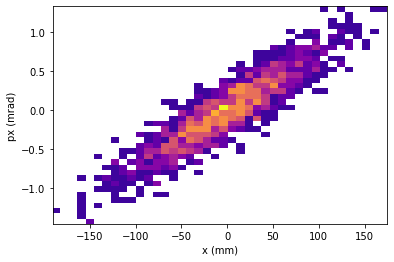

In [11]:
# hist2d

mycmap = plt.get_cmap('plasma') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1e-30 # something tiny
# Bin particles
plt.hist2d(x=1000*xdata, y=ydata,  bins=2*[40], weights=weights, cmap=mycmap, vmin=myvmin)
plt.xlabel('x (mm)')
plt.ylabel('px (mrad)')
plt.show()

/Users/slepicka/mc/envs/lume/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  


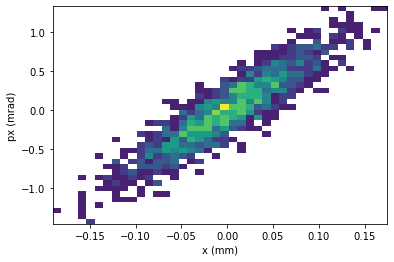

In [12]:
# Numpy histogram 2d, with custom color map

import matplotlib.colors as colors

mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
H, xedges, yedges = np.histogram2d(xdata, ydata, weights=chargedat, bins=40)

xmin, xmax = min(xedges), max(xedges)
ymin, ymax = min(yedges), max(yedges)

image = np.flip(H.T, axis=0) # 
imax = np.max(image)
norm=colors.Normalize(vmin=1e-12*imax, vmax=imax)
plt.xlabel('x (mm)')
plt.ylabel('px (mrad)')
plt.imshow(image, cmap=mycmap, norm=norm, extent=[xmin, xmax, ymin, ymax], aspect='auto')

In [13]:
np.min(image), np.max(image)

(0.0, 8.469999999999999e-13)

## Plot in Bokeh

In [14]:
from bokeh.plotting import figure, show, output_notebook
from bokeh import palettes, colors
from bokeh.models import ColumnDataSource, HoverTool
output_notebook(verbose=False, hide_banner=True)

pal = palettes.Viridis[256]
#white=colors.named.white
#pal[0] = white # replace 0 with white

In [15]:
H, xedges, yedges = np.histogram2d(xdata, ydata, weights=chargedat, bins=40)
xmin, xmax = min(xedges), max(xedges)
ymin, ymax = min(yedges), max(yedges)

In [16]:
ds = ColumnDataSource(data=dict(image=[H.transpose()]))   
p = figure(x_range=[xmin, xmax], y_range=[ymin, ymax], title='Bunch at end', 
           x_axis_label='z (mm)', y_axis_label='pz (1e-3)',
           plot_width=500, plot_height=500)
p.image(image='image', source=ds, 
    x=xmin, y=ymin, dw=xmax-xmin, dh=ymax-ymin, palette=pal)
show(p)

## Data for ParticleGroup

The above commands have been packaged into two functions for easier use, and to easily create ParticleGroup objects

In [17]:
from pytao.tao_ctypes.bunch import get_bunch_stats, get_bunch_data

In [18]:
# Get typical stats
stats = get_bunch_stats(tao, 'end')
stats

{'beta_x': 0.30134457142882,
 'alpha_x': -2.1521049823636,
 'gamma_x': 18.68809459023,
 'phi_x': 0.0,
 'eta_x': -0.048190545736803,
 'etap_x': -0.45493969485518,
 'sigma_x': 6.0545051529212e-05,
 'sigma_p_x': 0.00047679256976393,
 'emit_x': 1.2164490793028e-08,
 'norm_emit_x': 9.9974344364893e-07,
 'beta_y': 0.40783204147832,
 'alpha_y': 1.9440813313188,
 'gamma_y': 11.719168031668,
 'phi_y': 0.0,
 'eta_y': -0.045730121878916,
 'etap_y': 0.026397863550044,
 'sigma_y': 7.0434481918443e-05,
 'sigma_p_y': 0.00037756614304414,
 'emit_y': 1.2164361154991e-08,
 'norm_emit_y': 9.9973278929603e-07,
 'beta_z': 95.824240685781,
 'alpha_z': -1.2405916961694,
 'gamma_z': 0.026497134111715,
 'phi_z': 0.0,
 'eta_z': 0.0,
 'etap_z': 0.0,
 'sigma_z': 0.00089945844475665,
 'sigma_p_z': 1.4956943815201e-05,
 'emit_z': 8.4428062049241e-09,
 'norm_emit_z': 6.9387533707609e-07,
 'beta_a': 0.2485349129631,
 'alpha_a': -1.7750276192378,
 'gamma_a': 15.413909307857,
 'phi_a': 0.0,
 'eta_a': 0.0012487244918932

In [19]:
# Get data
data = get_bunch_data(tao, 'end')    
data.keys()

dict_keys(['x', 'px', 'y', 'py', 't', 'pz', 'weight', 'status', 'z', 'species'])

In [20]:
from pmd_beamphysics import ParticleGroup

P = ParticleGroup(data=data)
P

/Users/slepicka/mc/envs/lume/lib/python3.7/site-packages/pmd_beamphysics/plot.py:13: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_under('white')


<ParticleGroup with 1000 particles at 0x7fac682be810>

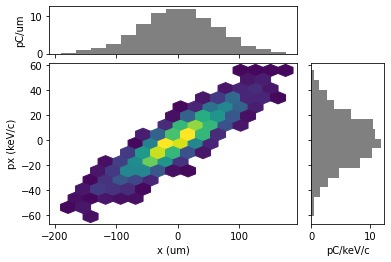

In [21]:
P.plot('x', 'px')

In [22]:
# Note the z is 0 by definition
P['mean_z']

0.0

In [23]:
# t it the total time
P['mean_t']*P['mean_beta']*299792458, stats['s']

(0.44500007497959254, 0.445)

In [24]:
P['norm_emit_x'], P['norm_emit_y']

(1.0008549032579537e-06, 1.0009242252848607e-06)

In [25]:
stats['norm_emit_x'], stats['norm_emit_y']

(9.9974344364893e-07, 9.9973278929603e-07)